In [74]:
import pandas as pd
import os
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tihon\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tihon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [83]:
stop_words = nltk.corpus.stopwords.words('english')
stop_words.append('uh')
import string
puncs = string.punctuation
import re

In [16]:
for ind,file in enumerate(os.listdir("labeled")):
    if ind==0:
        df=pd.read_csv("labeled/"+file,index_col=0)
    else:
        df1=pd.read_csv("labeled/"+file,index_col=0)
        df=pd.concat([df,df1])


In [64]:
df=df.dropna(subset='text').copy()

In [112]:
df["text_new"]=df["text"].apply(lambda x: [word for word in [re.sub(f"[{puncs}]","",token).lower() for token in x.split() if token[0]!='@'] if word not in stop_words+['rt','']])
df["num_mentions"]=df["text"].apply(lambda x: len([i for i in x.split() if i[0]=='@']))
df["num_links"]=df["text"].apply(lambda x: len([i for i in x.split() if 'http'in i]))

### How often do NGOs answer

In [166]:
df.groupby(['relatedNGO','label']).count()[['id']]

id
relatedNGO      label       
BritishRedCross 0.0    18652
                1.0     1702
CatholicRelief  0.0     1071
                1.0       19
Ch_JesusChrist  0.0    16566
                1.0       19
Habitat_org     0.0     4737
                1.0      250
ICRC_Nairobi    0.0     1336
                1.0      104
IFRC_Europe     0.0     4742
                1.0       30
NepalRedCross   0.0      206
                1.0       22
RESCUEorg       0.0     2894
                1.0       14
RedCross        0.0    66318
                1.0     1672
RedCrossAU      0.0     4996
                1.0      606
RedCrossLebanon 0.0     6930
                1.0       88
SalvationArmyUS 0.0     1149
                1.0      100
SavetheChildren 0.0     4223
                1.0      112
WorldVision     0.0     4401
                1.0      359
boyscouts       0.0     8070
                1.0        2
girlscouts      0.0     2305
                1.0      208
irishredcross   0.0     1068
                1.0       36
philredcross    0.0     9300
                1.0      452
redcrosscanada  0.0    16274
                1.0     1528
ymca            0.0     1672
                1.0       38

### Average number of mentions and links text depending on label

In [168]:
df.groupby(['label']).mean()[['num_mentions','num_links']]

C:\Users\tihon\AppData\Local\Temp\ipykernel_32900\348340680.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['label']).mean()[['num_mentions','num_links']]


,num_mentions,num_links
label,,
0.0,1.767028,0.186609
1.0,1.913735,0.100258


### Most popular words for label 0 and 1

In [115]:
word_count_0={}
word_count_1={}
for line in df[df['label']==0]['text_new']:
    for word in line:
        word_count_0[word]=word_count_0.get(word,0)+1

for line in df[df['label']==1]['text_new']:
    for word in line:
        word_count_1[word]=word_count_1.get(word,0)+1

In [139]:
#no answer
words_no_answer=sorted(word_count_0.items(),key=lambda x:x[1],reverse=True)
print(words_no_answer[:5])

[('police', 36536), ('iranian', 36200), ('people', 29617), ('use', 19504), ('voice', 19417)]


In [160]:
#not answered having this word comparing to all having this word
for word_count in words_no_answer[:5]:
    word=word_count[0]
    print(word,sum(df[df['label']==0]['text_new'].apply(lambda x: word in x))/sum(df['text_new'].apply(lambda x: word in x)))

police 0.9993625836608945
iranian 1.0
people 0.9809269099482704
use 0.9935940142469123
voice 0.9997922725384296


In [156]:
#answered
words_answer=sorted(word_count_1.items(),key=lambda x:x[1],reverse=True)
print(words_answer[:5])

[('red', 854), ('cross', 818), ('help', 711), ('donate', 691), ('blood', 634)]


In [161]:
#answered having this word comparing to all having this word
for word_count in words_answer[:5]:
    word=word_count[0]
    print(word,sum(df[df['label']==1]['text_new'].apply(lambda x: word in x))/sum(df['text_new'].apply(lambda x: word in x)))

red 0.07674003569303986
cross 0.07821813238523476
help 0.05292181069958848
donate 0.09933260903305913
blood 0.10030983733539892


In [ ]:
for word_count in words_answer[:5]:
    word=word_count[0]
    print(word,sum(df['text_new'].apply(lambda x: word in x))/df.shape[0])

### Number of words in the tweet

In [125]:
import matplotlib.pyplot as plt
%matplotlib inline

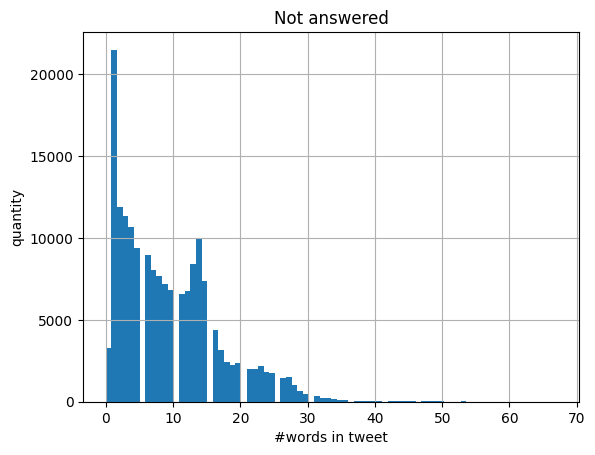

In [133]:
df[df['label']==0]["text_new"].apply(lambda x:len(x)).to_frame().hist(bins=80)
plt.title("Not answered")
plt.xlabel("#words in tweet")
plt.ylabel("quantity")
None

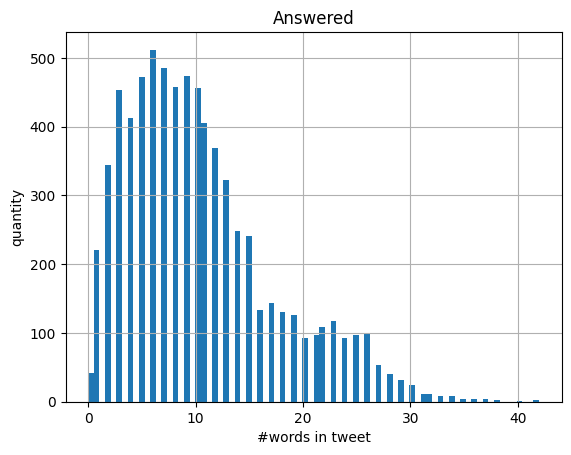

In [134]:
df[df['label']==1]["text_new"].apply(lambda x:len(x)).to_frame().hist(bins=80)
plt.title("Answered")
plt.xlabel("#words in tweet")
plt.ylabel("quantity")
None

## Users dataset bot labeling

In [ ]:
df['possible_bot'] = df['tweet_count'].apply(lambda x: 1 if x == 1 else 0)
df.loc[(df['followers_count'] == 0) & (df['following_count'] == 0), 'possible_bot'] = 1
df

In [ ]:
df.to_csv('users/users_bot_labeled.csv')